# Linear Regression Example

This is an example of Ordinary Lease Squares Linear Regression. Get data from ```sklearn.datasets``` which is a package embeds some smnall toy datasets. Evaluate with MSE and R2-score.

Originial feature datasets:(442, 1)
-----------------------------------------
training datasets:(309, 1), (309,)
testing datasets:(310, 1), (310,)
-----------------------------------------
Coefficients: [976.10822731]
Mean Square Error: 3853.4712
Coefficient of determination: 0.3777
-----------------------------------------


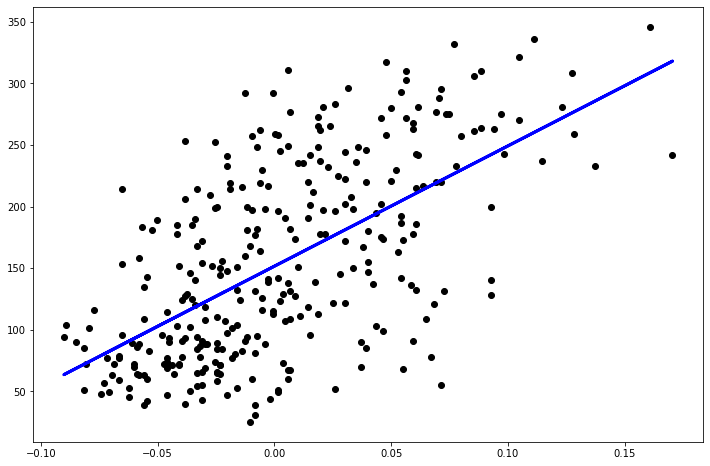

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only on feature
diabetes_X = diabetes_X[:, np.newaxis, 2] # np.newaxis is None
print(f'Originial feature datasets:{diabetes_X.shape}')
print('-----------------------------------------')

# Split the data into training/testing sets 80%:20%
training_size = 0.7
diabetes_X_train = diabetes_X[:int(diabetes_X.shape[0] * training_size)]
diabetes_X_test = diabetes_X[int(diabetes_X.shape[0] * (1 - training_size)):]

diabetes_y_train = diabetes_y[:int(diabetes_y.shape[0] * training_size)]
diabetes_y_test = diabetes_y[int(diabetes_y.shape[0] * (1 - training_size)):]
print(f'training datasets:{diabetes_X_train.shape}, {diabetes_y_train.shape}')
print(f'testing datasets:{diabetes_X_test.shape}, {diabetes_y_test.shape}')
print('-----------------------------------------')

# Create Linear Regression object
model = linear_model.LinearRegression()

# Train the model using the training sets
model.fit(diabetes_X_train, diabetes_y_train)

# Predict using testing sets
y_hat = model.predict(diabetes_X_test)

# Evaluate the model
print(f'Coefficients: {model.coef_}')
print('Mean Square Error: %.4f' % mean_squared_error(diabetes_y_test, y_hat))
print('Coefficient of determination: %.4f' % r2_score(diabetes_y_test, y_hat)) #TODO: why r2_score is the coefficient of determination?
print('-----------------------------------------')

# Plot outputs
plt.figure(figsize=(12, 8))

plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, y_hat, color='blue', linewidth=3)

plt.show()